# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import datasets
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [11]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
df_limpo = df.drop(columns=['ocean_proximity']).dropna()
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

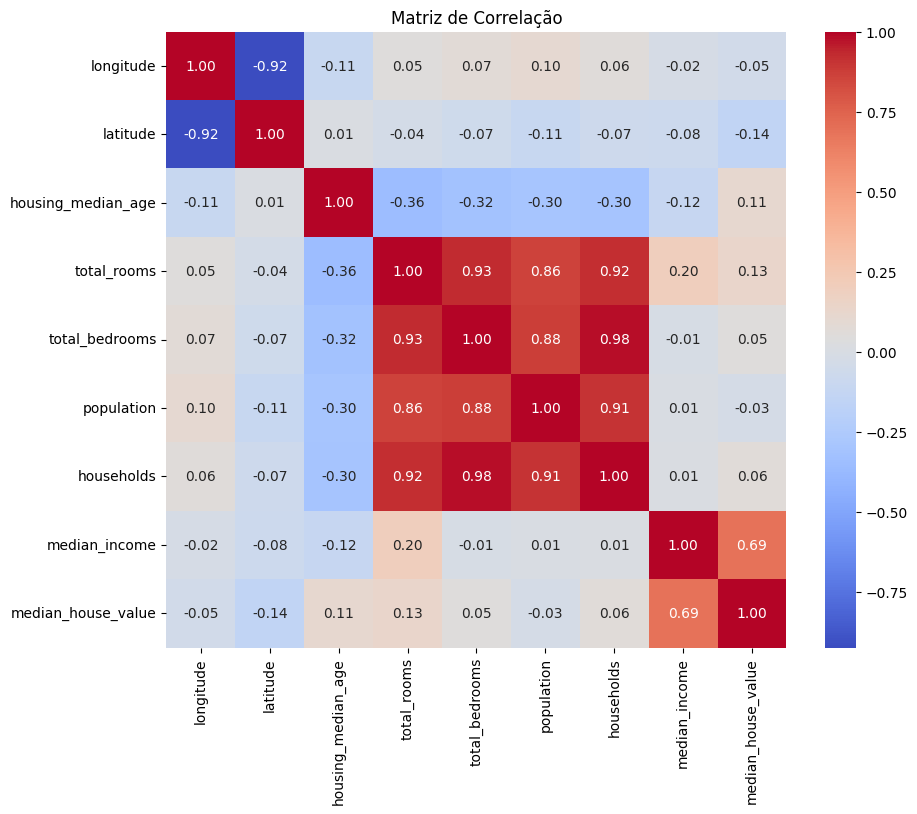

In [17]:
correlacao = df_limpo.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

A Renda mediana tem uma correlação positiva, assim como a quantidade de pessoas com a quatidade de cômodos também tem essa relação.

Latitude e longitude possuem uma correlção negativa.


### 3. Separe os dados em validação e teste

In [18]:

X = df_limpo.drop(columns=['median_house_value'])
y = df_limpo['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dados de treino: {X_train.shape}, {y_train.shape}")
print(f"Dados de teste: {X_test.shape}, {y_test.shape}")

Dados de treino: (14303, 8), (14303,)
Dados de teste: (6130, 8), (6130,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [23]:

tree_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_8.fit(X_train, y_train)

tree_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_2.fit(X_train, y_train)


y_pred_8 = tree_8.predict(X_test)
y_pred_2 = tree_2.predict(X_test)



### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [24]:

mse_8 = mean_squared_error(y_test, y_pred_8)
mse_2 = mean_squared_error(y_test, y_pred_2)


print(f"MSE (Profundidade = 8): {mse_8}")
print(f"MSE (Profundidade = 2): {mse_2}")

MSE (Profundidade = 8): 4092601634.242608
MSE (Profundidade = 2): 7410749993.534345


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [ ]:
#A Arvore de profundidade 8 seria melhor, porém ela pode apresentar um overfitting

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

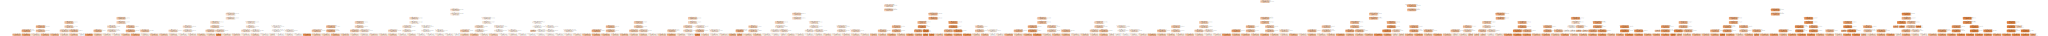

In [32]:

dot_data = export_graphviz(
    tree_8,
    out_file=None,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

Acredito que median_income seja a mais importante, por se tratar se um valor alto com uma amostra alta.